In [1]:
import pandas as pd 
import os

In [3]:
os.chdir('../raw_data')

In [4]:
ranking = pd.read_csv('clean_data_ranked_stores.csv')

In [6]:
ranking.head(5)

,store_id,block_id,mall_id,external_mall_id,mall_country,store_branch_level_1,store_branch_level_2,store_branch_level_3,sales,engagement,traffic,cost,TOPSIS_Closeness,Rank
0,4384.0,6677,26.0,22,France,Food & Beverage Services,Fast Meal,Sandwiches,0.622756,0.671812,0.043457,0.243480,0.664139,1
1,511.0,7098,1.0,19,Austria,Health & Beauty,Hair & Body,"Beauty salons, UVA and nail salons",0.289161,1.000000,0.040449,0.247065,0.642234,2
2,12117.0,11480,68.0,32,United Kingdom,Health & Beauty,Hair & Body,"Beauty salons, UVA and nail salons",0.257096,0.966826,0.013247,0.208264,0.621835,3
3,11324.0,6449,64.0,26,Spain,Health & Beauty,Hair & Body,Hairdressers,0.309662,0.886701,0.033031,0.158803,0.616156,4
4,5779.0,4403,15.0,17,France,Food & Beverage Services,Service to table restaurants,Mediterranean and Oriental - Service to table ...,0.494184,0.717740,0.082490,0.034596,0.611865,5


# basic

In [8]:
ranking.shape[0]

2430

In [66]:
# consider the top 10% stores
critiera = [ 'sales', 'engagement', 'traffic', 'cost', 'TOPSIS_Closeness']

In [156]:
ranking.loc[ranking['store_branch_level_1']=='Department Stores']

,store_id,block_id,mall_id,external_mall_id,mall_country,store_branch_level_1,store_branch_level_2,store_branch_level_3,sales,engagement,traffic,cost,TOPSIS_Closeness,Rank
2108,9333.0,11293,54.0,18,Netherlands,Department Stores,Department Stores,Department Stores,0.252425,0.001394,0.219351,0.001493,0.223713,2109
2232,10221.0,5985,57.0,23,Sweden,Department Stores,Department Stores,Department Stores,0.256552,0.004326,0.293582,0.002643,0.210667,2233


In [93]:
ranking[['store_branch_level_1', 'store_branch_level_2']].drop_duplicates().sort_values(by='store_branch_level_1', ascending=True)

,store_branch_level_1,store_branch_level_2
279,Auto,Auto Dealer
169,Bags & Footwear & Accessories,Footwear
80,Bags & Footwear & Accessories,Leath. Bags/Luggage
79,Bags & Footwear & Accessories,Accessories
124,Culture & Media & Technology,Mobile Phones & Communication
840,Culture & Media & Technology,Computer Products & Electronics games
68,Culture & Media & Technology,Electronics and household appliances
273,Culture & Media & Technology,"Books, Music & Multimedia"
166,Culture & Media & Technology,General Culture & Media & Technology
2108,Department Stores,Department Stores


### understand branches

# 头部分析

In [18]:
top10 = ranking.head(243)
top10_rank = top10[['store_branch_level_1', 'store_id']].groupby('store_branch_level_1', as_index=False).count().sort_values(by='store_id', ascending=False)

In [ ]:
top10_rank['percentage'] = top10_rank['store_id']*100/top10.shape[0]
head_5 = top10_rank.head(5).loc[:,['store_branch_level_1', 'percentage']]

In [39]:
head_5 = pd.concat([head_5, pd.DataFrame({'store_branch_level_1':['other'], 'percentage':[100 - head_5['percentage'].sum()]})])

In [44]:
head_5['percentage'] = head_5['percentage'].apply(lambda x: round(x, 1))

In [ ]:
head_5

,store_branch_level_1,percentage
5,Food & Beverage Services,44.4
7,Health & Beauty,21.0
3,Fashion apparel,10.7
11,Services,7.8
0,Bags & Footwear & Accessories,4.1
0,other,11.9


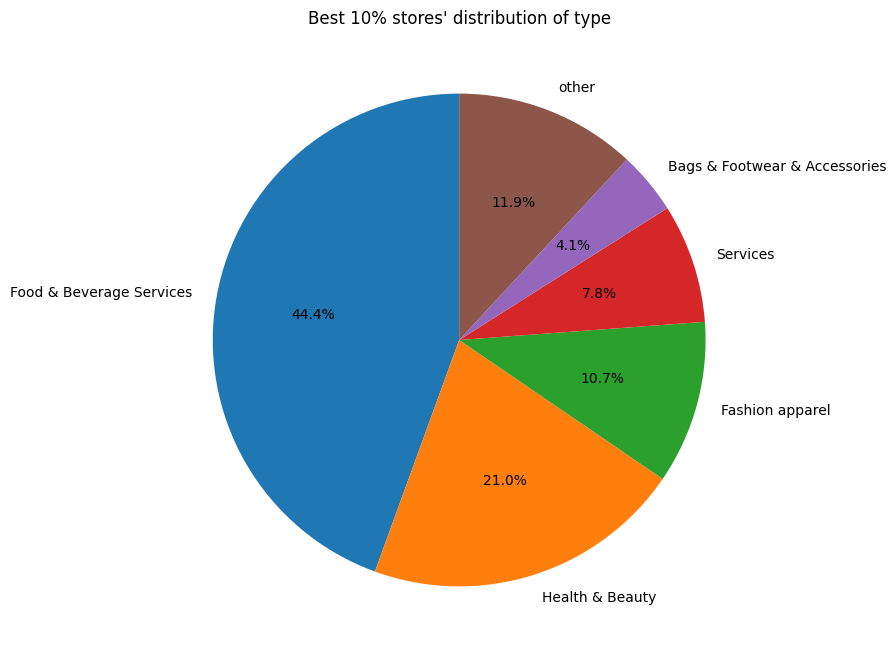

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(head_5['percentage'], labels=head_5['store_branch_level_1'], autopct='%1.1f%%', startangle=90)
ax.set_title("Best 10% stores' distribution of type")

plt.show()

## each criteria

In [75]:
osheet = ranking[['store_branch_level_1']+critiera]
avg_osheet = osheet.groupby('store_branch_level_1', as_index=False).mean()

In [78]:
avg_osheet = avg_osheet.sort_values(by='TOPSIS_Closeness', ascending=False)

In [81]:
avg_osheet = avg_osheet.loc[avg_osheet['store_branch_level_1']!='Other']
avg_osheet.head(5)

,store_branch_level_1,sales,engagement,traffic,cost,TOPSIS_Closeness
15,Services,0.267393,0.235530,0.094585,0.174782,0.338178
7,Food & Beverage Services,0.268735,0.220055,0.139675,0.082228,0.315944
10,Health & Beauty,0.267146,0.147375,0.144913,0.100492,0.292441
4,Entertainment,0.265981,0.146865,0.129695,0.038992,0.287700
12,Jewellery,0.270138,0.100950,0.120987,0.128196,0.278736


### Sales

In [108]:
critiera[:-1]
rts_1 = []
rts_2 = []
for c in critiera[:-1]:
    if c == 'cost':
        x = avg_osheet.sort_values(by=c, ascending=True).head(5)
    else:
        x = avg_osheet.sort_values(by=c, ascending=False).head(5)
    x1 = x[['store_branch_level_1']]; x2 = x[[c]]
    x1.columns = [c]
    x1.reset_index(drop=True, inplace=True); x2.reset_index(drop=True, inplace=True)
    rts_1.append(x1); rts_2.append(x2)

In [ ]:
pd.concat(rts_1, axis=1)

In [110]:
pd.concat(rts_2, axis=1)

,sales,engagement,traffic,cost
0,0.277037,0.235530,0.256466,0.002068
1,0.275130,0.220055,0.223197,0.038992
2,0.272399,0.147375,0.183192,0.049081
3,0.270138,0.146865,0.158397,0.058275
4,0.268735,0.126723,0.152744,0.058666


# country

In [138]:
countries = set(ranking['mall_country'])

In [118]:
ranking.head(5)

,store_id,block_id,mall_id,external_mall_id,mall_country,store_branch_level_1,store_branch_level_2,store_branch_level_3,sales,engagement,traffic,cost,TOPSIS_Closeness,Rank
0,4384.0,6677,26.0,22,France,Food & Beverage Services,Fast Meal,Sandwiches,0.622756,0.671812,0.043457,0.243480,0.664139,1
1,511.0,7098,1.0,19,Austria,Health & Beauty,Hair & Body,"Beauty salons, UVA and nail salons",0.289161,1.000000,0.040449,0.247065,0.642234,2
2,12117.0,11480,68.0,32,United Kingdom,Health & Beauty,Hair & Body,"Beauty salons, UVA and nail salons",0.257096,0.966826,0.013247,0.208264,0.621835,3
3,11324.0,6449,64.0,26,Spain,Health & Beauty,Hair & Body,Hairdressers,0.309662,0.886701,0.033031,0.158803,0.616156,4
4,5779.0,4403,15.0,17,France,Food & Beverage Services,Service to table restaurants,Mediterranean and Oriental - Service to table ...,0.494184,0.717740,0.082490,0.034596,0.611865,5


In [151]:
def country_rank(country):
    mask = (ranking['mall_country']==country) & (ranking['store_branch_level_1']!='Other')
    ranking_c = ranking.loc[mask, ['store_branch_level_1']+critiera]
    result = ranking_c.groupby('store_branch_level_1', as_index=False).mean().sort_values(by='TOPSIS_Closeness', ascending=False).head(5)
    return result

c_results = []
for c in countries:
    c_r = country_rank(c)[['store_branch_level_1']]
    c_r.columns = [c]
    c_r.reset_index(drop=True, inplace=True)
    c_results.append(c_r) 
c_results = pd.concat(c_results, axis=1)

In [154]:
c_results.to_excel('top_branch_store_countries.xlsx', index=False)

## mall

In [158]:
all_data = pd.read_csv('all_data.csv')

In [160]:
all_data.columns

Index(['Unnamed: 0', 'external_mall_id', 'block_id', 'average_dwell_time',
       'median_dwell_time', 'store_id', 'store_visits_monthly_average',
       'store_window_flow_monthly_average', 'store_visits_daily_average',
       'store_window_flow_daily_average', 'store_total_visits',
       'store_total_window_flow', 'days_with_traffic_data', 'mall_name',
       'mall_country', 'mall_id', 'total_mall_area', 'store_name',
       'store_year_opened', 'store_year_closed', 'store_branch_level_1',
       'store_branch_level_2', 'store_branch_level_3', 'store_sales_r12m',
       'store_rent_r12m', 'store_area', 'rent_incentive_r12m',
       'service_charges_r12m', 'marketing_costs_r12m',
       'administration_fees_r12m', 'real_estate_taxes_r12m',
       'large_scale_works_r12m', 'maintenance_works_r12m'],
      dtype='object')

In [167]:
mall_names = all_data[['store_id', 'block_id', 'mall_id','external_mall_id', 'mall_name']]

In [171]:
ranking.shape

(2430, 14)

In [205]:
mall_names.drop_duplicates(inplace=True)
rankings_with_mall = mall_names.merge(ranking, on=['store_id', 'block_id', 'mall_id', 'external_mall_id'], how='right')
rankings_with_mall.shape

/var/folders/z9/zf5v62yj5_75v0dwqpq9c7nw0000gn/T/ipykernel_94825/3100334654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mall_names.drop_duplicates(inplace=True)


(2430, 15)

In [206]:
critiera

['sales', 'engagement', 'traffic', 'cost', 'TOPSIS_Closeness']

In [209]:
# calculate the malls
top_5_malls = rankings_with_mall[['mall_name', 'mall_country']+critiera].groupby(['mall_name', 'mall_country'], as_index=False).mean().sort_values(by='TOPSIS_Closeness', ascending=False).head(6)

In [214]:
top_5_malls = top_5_malls.loc[top_5_malls['mall_name']!='Westfield Carré Sénart']

In [237]:
top_5_malls

,mall_name,mall_country,sales,engagement,traffic,cost,TOPSIS_Closeness
15,Westfield Parquesur,Spain,0.262194,0.169844,0.162055,0.087806,0.294388
7,Westfield Glòries,Spain,0.273430,0.131505,0.140109,0.074031,0.287955
13,Westfield Mokotow,Poland,0.277033,0.107791,0.120278,0.092905,0.286788
20,Westfield Vélizy 2,France,0.276868,0.110755,0.125477,0.095450,0.285619
12,Westfield Mall of The Netherlands,Netherlands,0.268814,0.104283,0.119110,0.078437,0.283786


In [215]:
ranking[['mall_country']+critiera].groupby('mall_country', as_index=False).mean().sort_values(by='TOPSIS_Closeness', ascending=False).head(5)

,mall_country,sales,engagement,traffic,cost,TOPSIS_Closeness
6,Spain,0.264461,0.140187,0.142371,0.085021,0.288281
4,Netherlands,0.268814,0.104283,0.119110,0.078437,0.283786
0,Austria,0.268426,0.099948,0.121408,0.084621,0.280363
1,Czech Republic,0.280598,0.083670,0.124798,0.097902,0.279026
5,Poland,0.273747,0.095024,0.133770,0.084013,0.278299


In [216]:
rankings_with_mall = rankings_with_mall.loc[rankings_with_mall['mall_name'].isin(set(top_5_malls['mall_name'])), ['mall_name', 'mall_country', 'store_branch_level_1', 'TOPSIS_Closeness']]

In [224]:
countries

{'Austria',
 'Czech Republic',
 'France',
 'Germany',
 'Netherlands',
 'Poland',
 'Spain',
 'Sweden',
 'United Kingdom'}

In [239]:
rankings_with_mall = rankings_with_mall.loc[rankings_with_mall['store_branch_level_1']!='Other']
r_m_r = rankings_with_mall.groupby(['mall_name', 'mall_country', 'store_branch_level_1'], as_index=False).mean()


mall_top_results = []
for m in set(top_5_malls['mall_name']):
    mall_r = r_m_r.loc[r_m_r['mall_name']==m].head(5)
    mall_r.sort_values(by='TOPSIS_Closeness', ascending=False, inplace=True)
    mall_top_results.append(mall_r)


In [255]:
mall_top_results[1]

,mall_name,mall_country,store_branch_level_1,TOPSIS_Closeness
11,Westfield Mall of The Netherlands,Netherlands,Bags & Footwear & Accessories,0.272992
12,Westfield Mall of The Netherlands,Netherlands,Culture & Media & Technology,0.264900
15,Westfield Mall of The Netherlands,Netherlands,Fashion apparel,0.259536
14,Westfield Mall of The Netherlands,Netherlands,Entertainment,0.228920
13,Westfield Mall of The Netherlands,Netherlands,Department Stores,0.223713


In [257]:
mall_top_comb_result = pd.concat(mall_top_results, axis=0)

In [259]:
mall_top_comb_result['store_branch_level_1'].value_counts()

store_branch_level_1
Bags & Footwear & Accessories     5
Fashion apparel                   5
Culture & Media & Technology      5
Food & Beverage Services          4
Entertainment                     3
Fitness                           1
Department Stores                 1
Food Stores & Mass Merchandise    1
Name: count, dtype: int64